In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import tree

In [3]:
packing_df = pd.read_csv('packing_sim.csv').dropna(how='all', axis=1) #drop empty columns
packing_df

,RCA,Pumice,Cement,Packing
0,0.00,0.00,1.00,0.600
1,0.00,0.05,0.95,0.612
2,0.00,0.10,0.90,0.624
3,0.00,0.15,0.85,0.637
4,0.00,0.20,0.80,0.650
...,...,...,...,...
225,0.90,0.05,0.05,0.650
226,0.90,0.10,0.00,0.637
227,0.95,0.00,0.05,0.630
228,0.95,0.05,0.00,0.618


In [4]:
X, y = np.split( packing_df.to_numpy(), [-1], axis = 1 ) #split features from last column
y = y.flatten()

In [5]:
np.unique(y).size # to help set a reasonable value for min_samples_split or min_samples_leaf
# 136 unique values vs 230 total samples

136

In [6]:
dtr = tree.DecisionTreeRegressor(max_depth=5) # give a max_depth to prevent overfit
dtr.fit(X, y)
dtr.score(X, y)

0.9023997784757601

### Test different values for max_depth

In [7]:
def test_depths(depths, dtr, X, y):
    for d in depths:
        dtr.set_params(max_depth=d)
        dtr.fit(X, y)
        print('max_depth:', d)
        print('n_leaves:', dtr.get_n_leaves())
        print('score:', dtr.score(X, y))
        print('gini importance', dtr.feature_importances_)
        print('========================================')

In [8]:
test_depths(range(2,8), dtr, X, y)

max_depth: 2
n_leaves: 4
score: 0.6041993742308802
gini importance [0. 0. 1.]
max_depth: 3
n_leaves: 8
score: 0.7305617913491047
gini importance [0.         0.06931748 0.93068252]
max_depth: 4
n_leaves: 16
score: 0.8408393903100106
gini importance [0.06466191 0.11736731 0.81797077]
max_depth: 5
n_leaves: 32
score: 0.9023997784757601
gini importance [0.09786384 0.12427207 0.7778641 ]
max_depth: 6
n_leaves: 56
score: 0.9361850561274226
gini importance [0.10066958 0.12012072 0.77920969]
max_depth: 7
n_leaves: 85
score: 0.9635968606197103
gini importance [0.10254288 0.13356118 0.76389594]


## Visualize tree

In [9]:
def viz_tree(dtr, depth, X, y):
    dtr.set_params(max_depth=depth)
    dtr.fit(X, y)
    tree.plot_tree(dtr, fontsize=3, feature_names=packing_df.columns[:-1], filled=True)
    plt.show()

In [10]:
%matplotlib inline

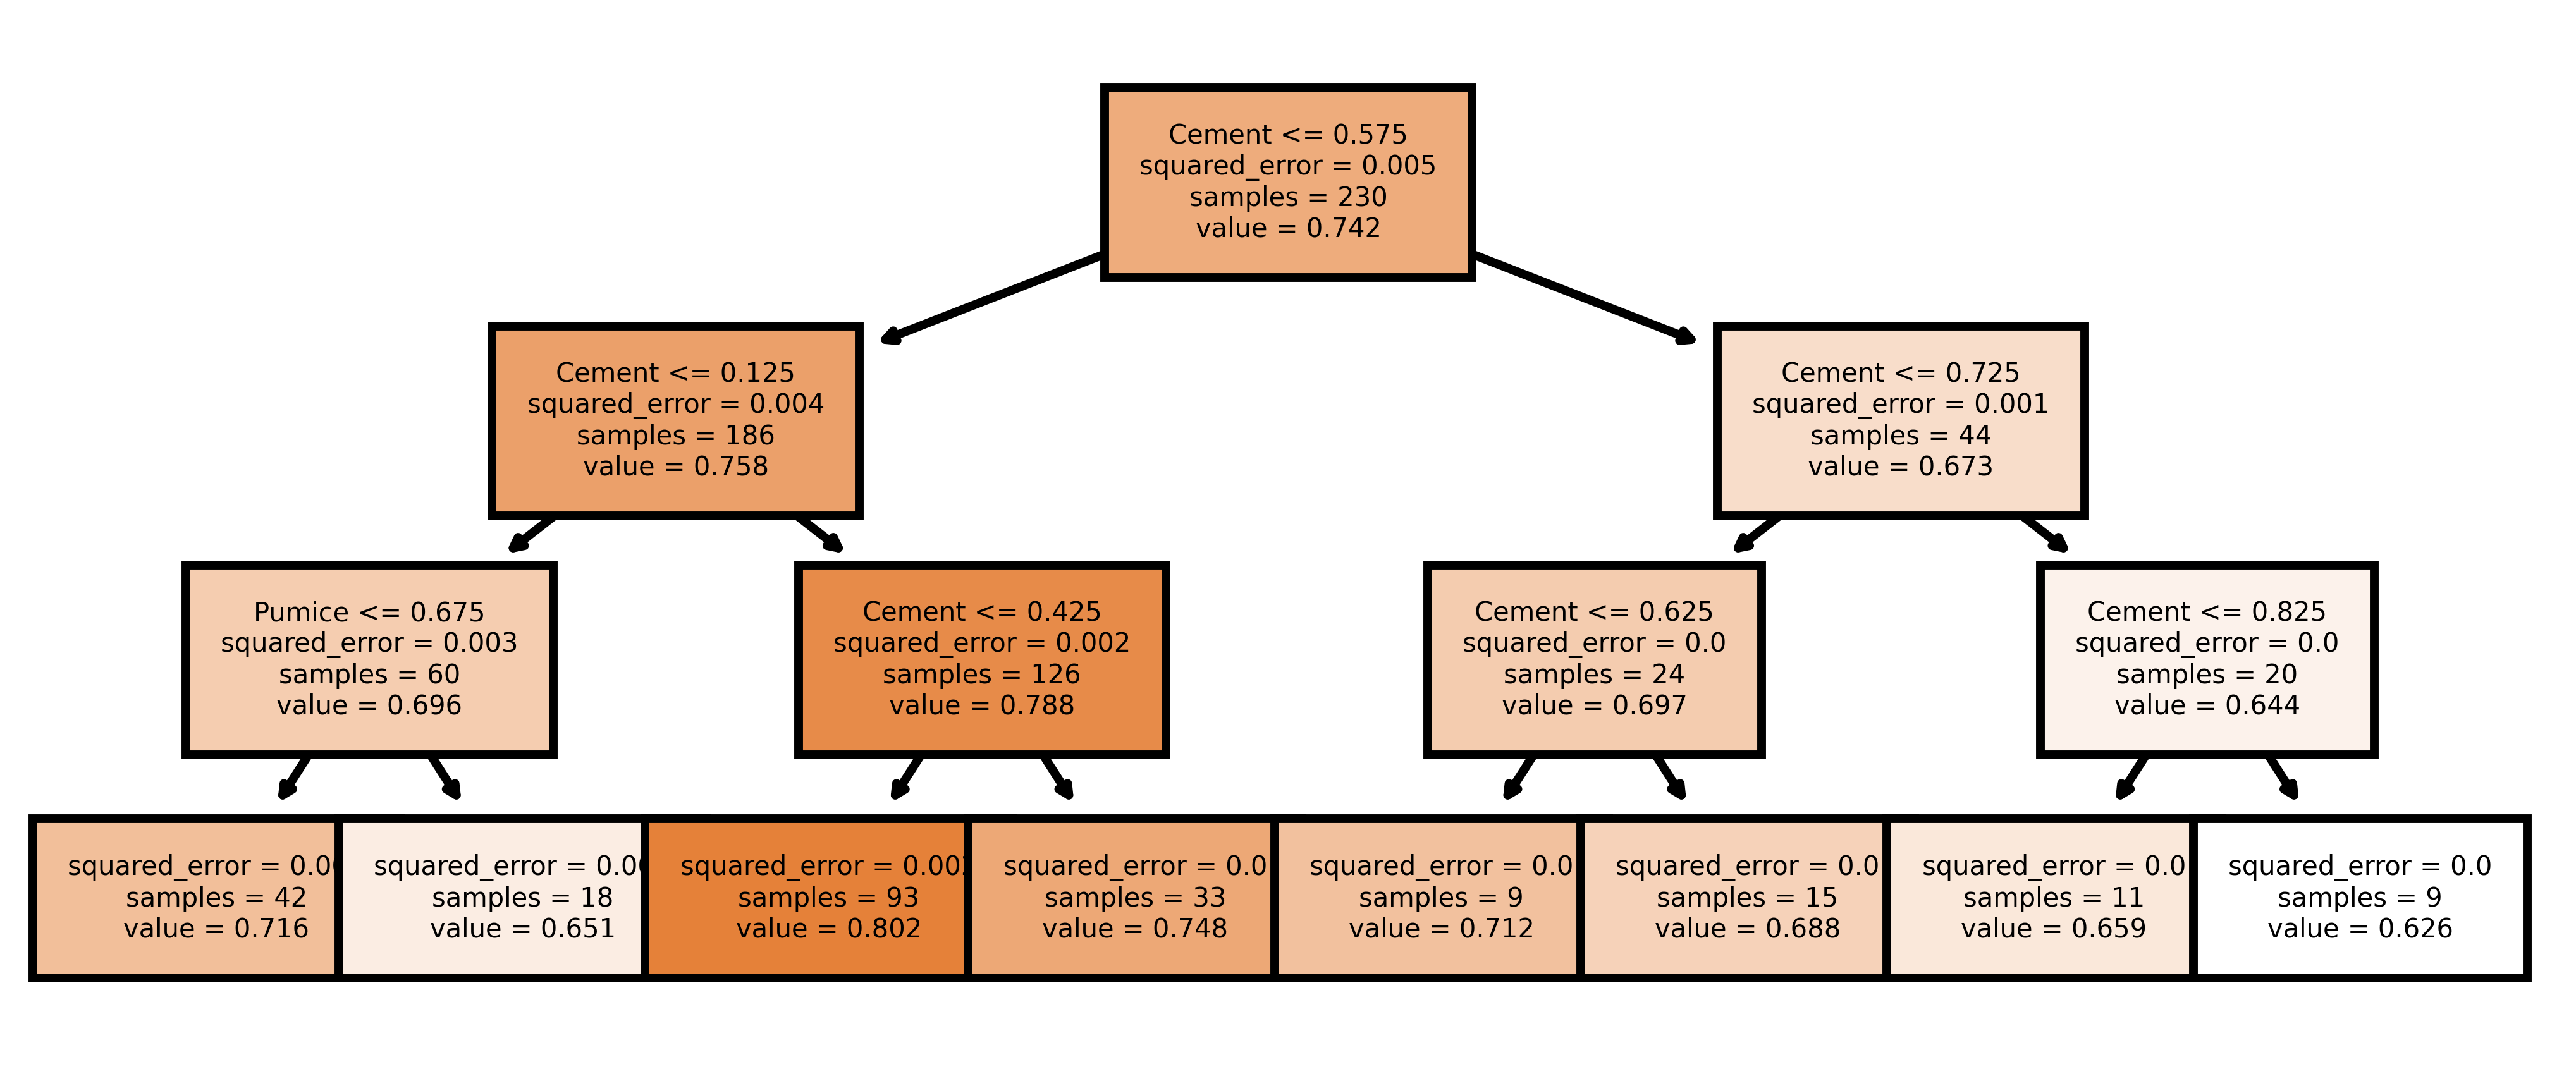

In [11]:
plt.figure(figsize=(5,2),dpi=1000) # a bit uh hard to fit
viz_tree(dtr,3,X,y)

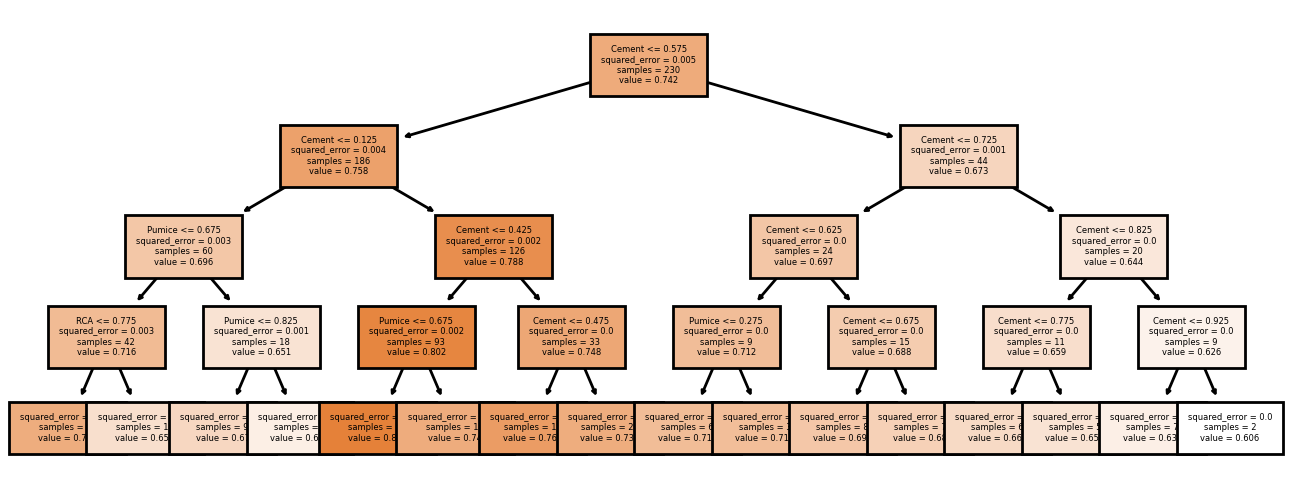

In [12]:
plt.figure(figsize=(8,3),dpi=200)
viz_tree(dtr,4,X,y)

In [13]:
# try pure leaves for the hell of it
# should probably use a random seed
pure_dtr = tree.DecisionTreeRegressor()
pure_dtr.fit(X,y) # was kinda fast actually
print('Max depth:', pure_dtr.get_depth())
print('Leaves:', pure_dtr.get_n_leaves())
print('Score:', pure_dtr.score(X, y)) # 1.0, of course since all leaves are pure

Max depth: 17
Leaves: 176
Score: 1.0


In [14]:
from sklearn import model_selection

In [15]:
X_tr, X_ts, y_tr, y_ts = model_selection.train_test_split(X, y, test_size=0.20)

In [16]:
pure_dtr.fit(X_tr, y_tr)
print('Train score:', pure_dtr.score(X_tr, y_tr)) # 1.0
print('Test score:', pure_dtr.score(X_ts, y_ts)) # around .94 or .95

Train score: 1.0
Test score: 0.947177410830138


In [17]:
pure_dtr.tree_.feature

array([ 2,  2,  1,  0,  1,  0,  2,  1,  0,  2, -2,  0, -2, -2, -2,  1,  0,
       -2, -2, -2,  1,  0,  0, -2,  1, -2, -2, -2, -2,  1, -2,  2, -2, -2,
        2,  1, -2,  1, -2, -2,  1,  2, -2,  0, -2, -2, -2,  0,  1, -2,  2,
       -2, -2,  0,  2,  1, -2,  2, -2, -2, -2, -2,  2,  1,  1, -2,  0, -2,
       -2,  0, -2, -2,  1,  0,  2,  1, -2, -2, -2, -2,  0, -2, -2,  2,  1,
        0,  2,  1,  0,  2,  2,  1,  0,  1,  1, -2, -2, -2, -2,  0, -2, -2,
        2,  1,  0,  0,  0,  2, -2,  1, -2, -2,  1, -2, -2, -2,  1, -2, -2,
        2,  1, -2, -2,  0, -2, -2,  1,  0,  0, -2, -2, -2,  0,  1, -2, -2,
       -2,  0,  0,  1, -2, -2, -2,  0, -2,  0, -2, -2,  2,  0,  1, -2,  1,
       -2, -2,  2, -2, -2, -2,  2,  2,  1, -2,  1, -2, -2,  0, -2,  0, -2,
       -2,  2,  1, -2, -2,  2,  1, -2, -2, -2,  1,  1, -2,  0, -2, -2,  0,
        1, -2, -2,  1, -2, -2,  0,  2, -2, -2, -2,  2,  1,  0, -2, -2,  1,
       -2, -2,  2,  0, -2, -2,  1, -2, -2,  2,  1,  0, -2,  1, -2, -2,  0,
        1, -2, -2, -2,  2

In [18]:
pure_dtr.feature_importances_

array([0.1110727 , 0.12855775, 0.76036956])

### DTR places most importance on the value of cement